<a href="https://colab.research.google.com/github/arinze-mbamalu/payment-behaviour-analysis/blob/main/Payment_Behavior_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Load the dataset
file_path = "/content/drive/MyDrive/Colab Notebooks/2025-02-01_2025-02-28_payment_1741268084.1566126.csv"
df = pd.read_csv(file_path)

# Display basic information and the first few rows
df.info(), df.head()


<ipython-input-5-cf718bb8055d>:7: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273726 entries, 0 to 273725
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   district          273726 non-null  object 
 1   customer          273723 non-null  object 
 2   old_acct_no       177327 non-null  object 
 3   account_no        273726 non-null  int64  
 4   payment_type      273726 non-null  object 
 5   amount            273726 non-null  float64
 6   cashier           273726 non-null  object 
 7   tariff            273726 non-null  object 
 8   new_tariff        236087 non-null  object 
 9   status            273726 non-null  object 
 10  trans_ref         273726 non-null  object 
 11  cust_category     273726 non-null  object 
 12  feeder            273722 non-null  object 
 13  feeder_code       273722 non-null  object 
 14  transformer       273699 non-null  object 
 15  transformer_code  273656 non-null  object 
 16  marketer          27

(None,
              district                             customer       old_acct_no  \
 0  ABAKALIKI DISTRICT                         NNACHI OKORO  59/12/06/6208-01   
 1  ABAKALIKI DISTRICT                           ONUOHA D S  59/14/01/0759-01   
 2  ABAKALIKI DISTRICT                              OKOYE J  59/16/20/2273-01   
 3  ABAKALIKI DISTRICT  ST. JOHN THE DIVINE ANGLICAN CHURCH  59/13/17/8010-01   
 4  ABAKALIKI DISTRICT       NWALI PATRICIA (CHUKWUDI EGBE)               NaN   
 
    account_no payment_type   amount cashier tariff new_tariff  status  ...  \
 0  4082736419         bill  17500.0     cdl    R2T   R2TA-NMD  Active  ...   
 1  2375729926         bill  34000.0     cdl    R2S   R2SB-NMD  Active  ...   
 2  5997027596         bill  48410.0    fets    R2T   R2TA-NMD  Active  ...   
 3  3562731845         bill  40000.0     cdl    A1T   A1TB-NMD  Active  ...   
 4  3900257658         bill  14000.0     cdl    C1S   C1SB-NMD  Active  ...   
 
   cust_category             

payment_date
2025-02-01    3.374388e+07
2025-02-02    3.118165e+06
2025-02-03    1.809436e+07
2025-02-04    5.385507e+07
2025-02-05    4.698858e+07
2025-02-06    1.301424e+08
2025-02-07    2.421964e+08
2025-02-08    1.102294e+08
2025-02-09    1.052607e+07
2025-02-10    1.245062e+08
2025-02-11    4.143111e+08
2025-02-12    4.781827e+08
2025-02-13    6.840031e+08
2025-02-14    9.352202e+08
2025-02-15    3.050941e+08
2025-02-16    3.925804e+07
2025-02-17    4.033687e+08
2025-02-18    8.452754e+08
2025-02-19    6.871835e+08
2025-02-20    5.021405e+08
2025-02-21    4.281749e+08
2025-02-22    1.626176e+08
2025-02-23    1.415864e+07
2025-02-24    3.026652e+08
2025-02-25    3.445458e+08
2025-02-26    5.558046e+08
2025-02-27    2.846726e+08
2025-02-28    4.970634e+08
Name: amount, dtype: float64


<ipython-input-10-a11b3d1a7dac>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['amount'].fillna(0, inplace=True)


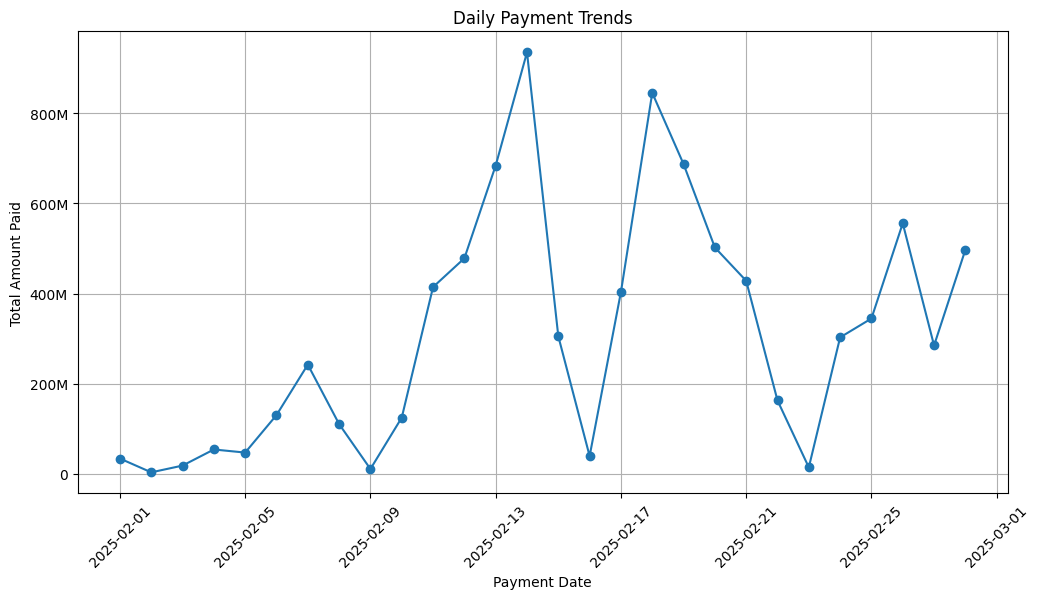

In [ ]:

# Convert 'payment_date' to datetime
df['payment_date'] = pd.to_datetime(df['payment_date'], errors='coerce')

# Convert 'account_no' to string to prevent scientific notation issues
df['account_no'] = df['account_no'].astype(str)

# Handling missing values (filling NaN with 'Unknown' for categorical and 0 for numerical)
df.fillna({'district': 'Unknown', 'customer': 'Unknown', 'tariff': 'Unknown', 'cust_category': 'Unknown'}, inplace=True)
df['amount'].fillna(0, inplace=True)

# Define the custom formatter function
def billions_formatter(x, pos):
    if x >= 1e9:
        return f'{x*1e-9:.1f}B'
    elif x >= 1e6:
        return f'{x*1e-6:.0f}M'
    else:
        return f'{x:.0f}'

# Aggregate payments by date
payment_trends = df.groupby('payment_date')['amount'].sum()
print(payment_trends)
# Plot payment trends over time
plt.figure(figsize=(12, 6))
plt.plot(payment_trends.index, payment_trends.values, marker='o', linestyle='-')
plt.xlabel('Payment Date')
plt.ylabel('Total Amount Paid')
plt.title('Daily Payment Trends')
plt.xticks(rotation=45)

# Apply formatter to y-axis
plt.gca().yaxis.set_major_formatter(FuncFormatter(billions_formatter))

plt.grid()
plt.show()


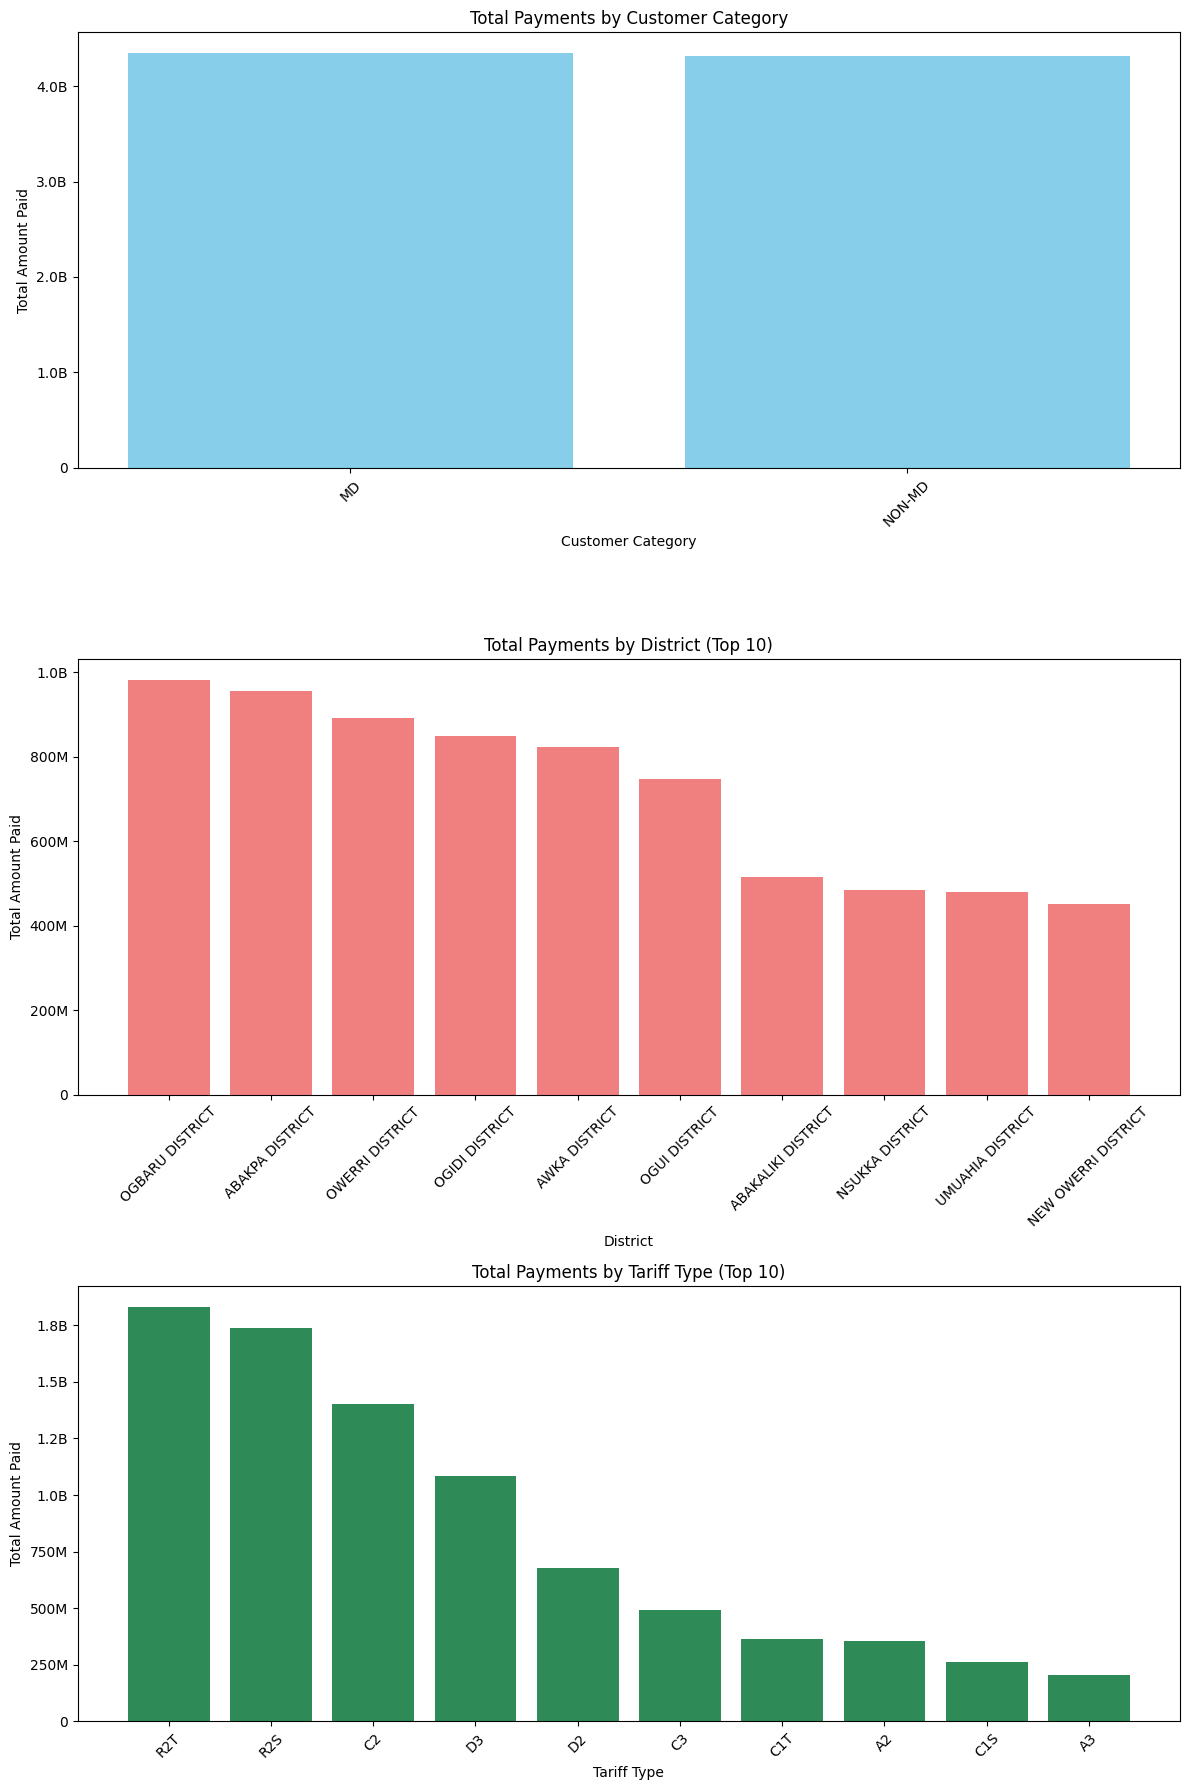

In [ ]:
# Aggregate payments by customer category
category_trends = df.groupby('cust_category')['amount'].sum().sort_values(ascending=False)

# Aggregate payments by district
district_trends = df.groupby('district')['amount'].sum().sort_values(ascending=False)

# Aggregate payments by tariff type
tariff_trends = df.groupby('tariff')['amount'].sum().sort_values(ascending=False)

# Plot settings
fig, axes = plt.subplots(3, 1, figsize=(12, 18))

# Payment Trends by Customer Category
axes[0].bar(category_trends.index, category_trends.values, color='skyblue')
axes[0].set_title('Total Payments by Customer Category')
axes[0].set_xlabel('Customer Category')
axes[0].set_ylabel('Total Amount Paid')
axes[0].tick_params(axis='x', rotation=45)

# Apply the formatter to the y-axis of axes[0]
axes[0].yaxis.set_major_formatter(FuncFormatter(billions_formatter))

# Payment Trends by District
axes[1].bar(district_trends.index[:10], district_trends.values[:10], color='lightcoral')  # Top 10 districts
axes[1].set_title('Total Payments by District (Top 10)')
axes[1].set_xlabel('District')
axes[1].set_ylabel('Total Amount Paid')
axes[1].tick_params(axis='x', rotation=45)

# Apply the formatter to the y-axis of axes[1]
axes[1].yaxis.set_major_formatter(FuncFormatter(billions_formatter))

# Payment Trends by Tariff Type
axes[2].bar(tariff_trends.index[:10], tariff_trends.values[:10], color='seagreen')  # Top 10 tariff types
axes[2].set_title('Total Payments by Tariff Type (Top 10)')
axes[2].set_xlabel('Tariff Type')
axes[2].set_ylabel('Total Amount Paid')
axes[2].tick_params(axis='x', rotation=45)

# Apply the formatter to the y-axis of axes[2]
axes[2].yaxis.set_major_formatter(FuncFormatter(billions_formatter))

plt.tight_layout()
plt.show()